In [82]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [83]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset
! unzip "bike-sharing-dataset.zip"

bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ahmad Maulana Rismadin
- **Email:** 11201004@student.itk.ac.id
- **ID Dicoding:** maulanakun

## Menentukan Pertanyaan Bisnis

- Apa korelasi antara suhu dan jumlah total sepeda yang disewa?
- Berapa peresentasi penyewaan sepeda berbeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [85]:
data_day = pd.read_csv("/content/day.csv")
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [86]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [87]:
data_day['dteday'] = pd.to_datetime(data_day['dteday'])
data_day['season'] = data_day.season.astype('category')
data_day['mnth'] = data_day.mnth.astype('category')
data_day['holiday'] = data_day.holiday.astype('category')
data_day['weekday'] = data_day.weekday.astype('category')
data_day['workingday'] = data_day.workingday.astype('category')
data_day['weathersit'] = data_day.weathersit.astype('category')

In [88]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [89]:
data_day.describe()

,instant,yr,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Gathering Data

In [90]:
data_day.season.replace((1,2,3,4), ('Musim dingin', 'Musim semi', 'Musim panas', 'Musim gugur'), inplace=True)

In [91]:
data_day.yr.replace((0,1), (2011,2012), inplace=True)

In [92]:
data_day.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

In [93]:
data_day.weathersit.replace((1,2,3,4), ('Jelas','Berkabut','Hujan_RinganSalju','Hujan_HujanSalju'), inplace=True)

In [94]:
data_day.weekday.replace((0,1,2,3,4,5,6), ('Minggu','Senin','Selasa','Rabu','Kamis','Jummat','Sabtu'), inplace=True)

In [95]:
data_day.workingday.replace((0,1), ('Tidak', 'Ya'), inplace=True)

In [96]:
data_day.rename(columns={
    "dteday" : "tanggal",
    "yr" : "tahun",
    "mnth" : "bulan",
    "weathersit" : "cuaca",
    "hum" : "kelembaban",
    "season" : "musim",
    "windspeed" : "kecepatan_angin",
    "cnt" : "total_count"}, inplace=True
)

In [97]:
data_day['temp'] = data_day['temp']*41
data_day['atemp'] = data_day['atemp']*50
data_day['kelembaban'] = data_day['kelembaban']*100
data_day['windspeed'] = data_day['kecepatan_angin']*67
data_day.head(5)

,instant,tanggal,musim,tahun,bulan,holiday,weekday,workingday,cuaca,temp,atemp,kelembaban,kecepatan_angin,casual,registered,total_count,windspeed
0,1,2011-01-01,Musim dingin,2011,Jan,0,Sabtu,Tidak,Berkabut,14.110847,18.18125,80.5833,0.160446,331,654,985,10.749882
1,2,2011-01-02,Musim dingin,2011,Jan,0,Minggu,Tidak,Berkabut,14.902598,17.68695,69.6087,0.248539,131,670,801,16.652113
2,3,2011-01-03,Musim dingin,2011,Jan,0,Senin,Ya,Jelas,8.050924,9.47025,43.7273,0.248309,120,1229,1349,16.636703
3,4,2011-01-04,Musim dingin,2011,Jan,0,Selasa,Ya,Jelas,8.200000,10.60610,59.0435,0.160296,108,1454,1562,10.739832
4,5,2011-01-05,Musim dingin,2011,Jan,0,Rabu,Ya,Jelas,9.305237,11.46350,43.6957,0.186900,82,1518,1600,12.522300


### Assessing Data

In [98]:
data_day.isna().sum()

instant            0
tanggal            0
musim              0
tahun              0
bulan              0
holiday            0
weekday            0
workingday         0
cuaca              0
temp               0
atemp              0
kelembaban         0
kecepatan_angin    0
casual             0
registered         0
total_count        0
windspeed          0
dtype: int64

In [99]:
data_day.duplicated().sum()

0

### Cleaning Data

In [100]:
data_day.dropna(axis=0, inplace=True)

In [101]:
data_day.drop_duplicates(inplace=True)

In [102]:
data_day.drop("instant", axis=1)
data_day.head(5)

,instant,tanggal,musim,tahun,bulan,holiday,weekday,workingday,cuaca,temp,atemp,kelembaban,kecepatan_angin,casual,registered,total_count,windspeed
0,1,2011-01-01,Musim dingin,2011,Jan,0,Sabtu,Tidak,Berkabut,14.110847,18.18125,80.5833,0.160446,331,654,985,10.749882
1,2,2011-01-02,Musim dingin,2011,Jan,0,Minggu,Tidak,Berkabut,14.902598,17.68695,69.6087,0.248539,131,670,801,16.652113
2,3,2011-01-03,Musim dingin,2011,Jan,0,Senin,Ya,Jelas,8.050924,9.47025,43.7273,0.248309,120,1229,1349,16.636703
3,4,2011-01-04,Musim dingin,2011,Jan,0,Selasa,Ya,Jelas,8.200000,10.60610,59.0435,0.160296,108,1454,1562,10.739832
4,5,2011-01-05,Musim dingin,2011,Jan,0,Rabu,Ya,Jelas,9.305237,11.46350,43.6957,0.186900,82,1518,1600,12.522300


## Exploratory Data Analysis (EDA)

In [103]:
data_day.columns

Index(['instant', 'tanggal', 'musim', 'tahun', 'bulan', 'holiday', 'weekday',
       'workingday', 'cuaca', 'temp', 'atemp', 'kelembaban', 'kecepatan_angin',
       'casual', 'registered', 'total_count', 'windspeed'],
      dtype='object')

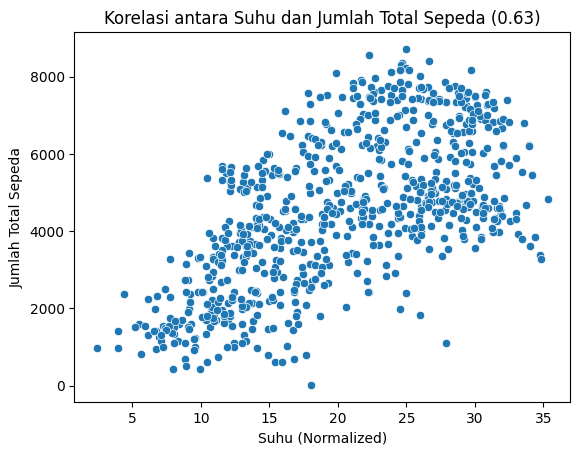

Terdapat hubungan positif antara suhu dan jumlah total sepeda.


In [104]:
# Korelasi antara suhu dan jumlah total sepeda
correlation = data_day['temp'].corr(data_day['total_count'])

if correlation > 0:
    correlation_interpretation = "Terdapat hubungan positif antara suhu dan jumlah total sepeda."
elif correlation < 0:
    correlation_interpretation = "Terdapat hubungan negatif antara suhu dan jumlah total sepeda."
else:
    correlation_interpretation = "Tidak ada hubungan linear yang signifikan antara suhu dan jumlah total sepeda."


sns.scatterplot(x='temp', y='total_count', data=data_day)
plt.title(f'Korelasi antara Suhu dan Jumlah Total Sepeda ({correlation:.2f})')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Total Sepeda')
plt.show()
print(correlation_interpretation)

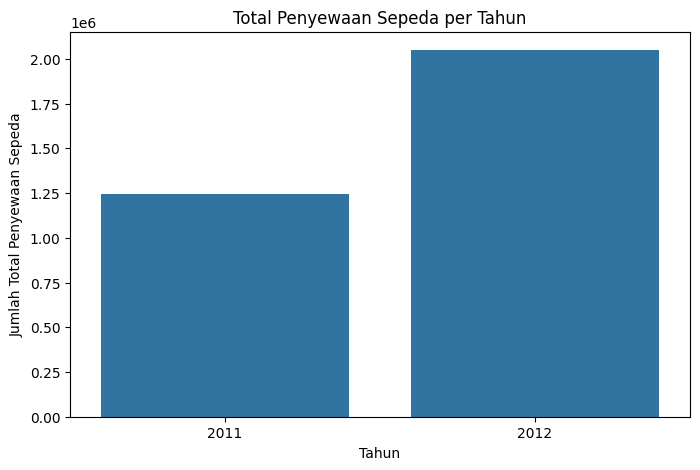

In [105]:
#Bagaimana pertumbuhan total penyewaan sepeda dari tahun ke tahun?
data_day['tanggal'] = pd.to_datetime(data_day['tanggal'])
data_day['tahun'] = data_day['tanggal'].dt.year
total_rentals_per_year = data_day.groupby('tahun')['total_count'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=total_rentals_per_year.index, y=total_rentals_per_year.values)
plt.title('Total Penyewaan Sepeda per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Total Penyewaan Sepeda')
plt.show()

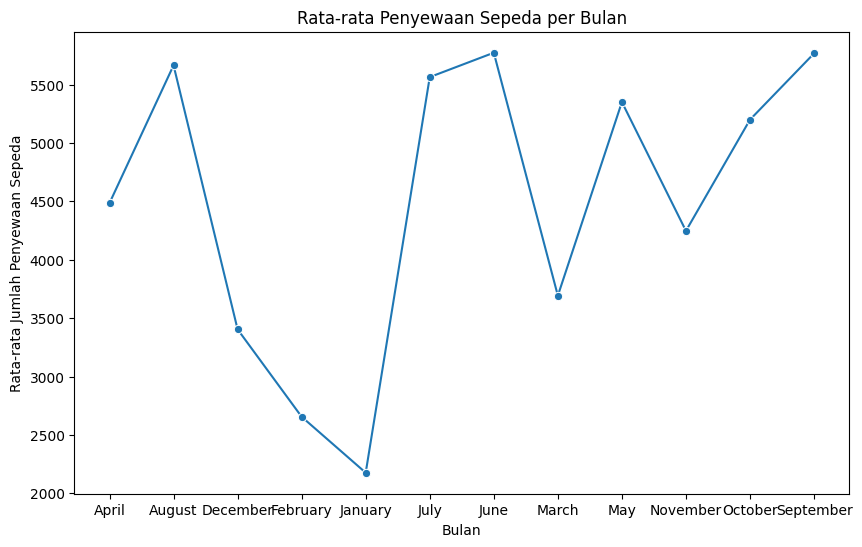

In [106]:
#Apakah ada bulan-bulan tertentu yang mengalami peningkatan atau penurunan signifikan dalam penyewaan?
data_day['bulan'] = data_day['tanggal'].dt.month_name()
monthly_rentals = data_day.groupby('bulan')['total_count'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_rentals.index, y=monthly_rentals.values, marker='o')
plt.title('Rata-rata Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.show()

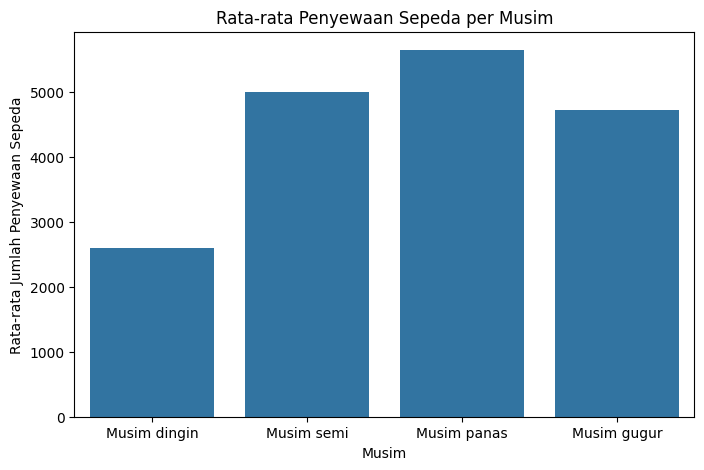

In [107]:
# Bagaimana tren penyewaan sepeda berubah di setiap musim?
seasonal_rentals = data_day.groupby('musim')['total_count'].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_rentals.index, y=seasonal_rentals.values)
plt.title('Rata-rata Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.show()

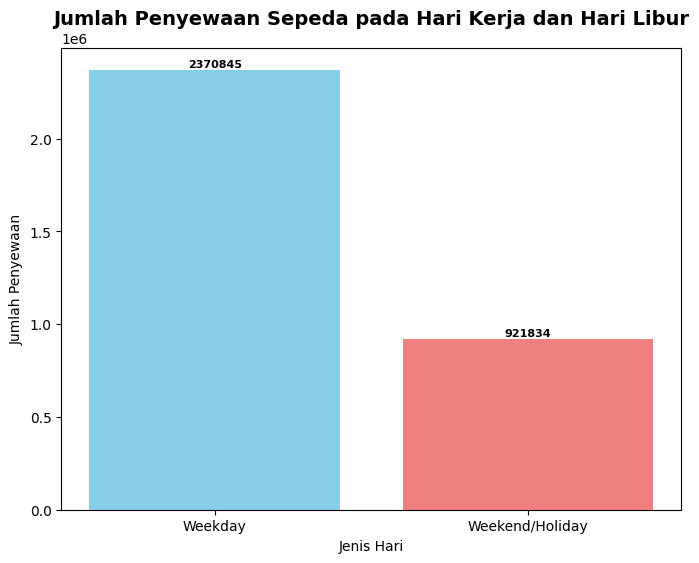

In [117]:
# berapa peresentasi penyewaan sepeda berbeda antara hari kerja dan hari libur?
day_type_rentals = data_day.groupby('day_type')['total_count'].sum()

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(day_type_rentals.index, day_type_rentals, color=['skyblue', 'lightcoral'])

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', fontsize=8, fontweight='bold')

ax.set_title('Jumlah Penyewaan Sepeda pada Hari Kerja dan Hari Libur', fontsize=14, fontweight='bold')
ax.set_xlabel('Jenis Hari')
ax.set_ylabel('Jumlah Penyewaan')

plt.show()

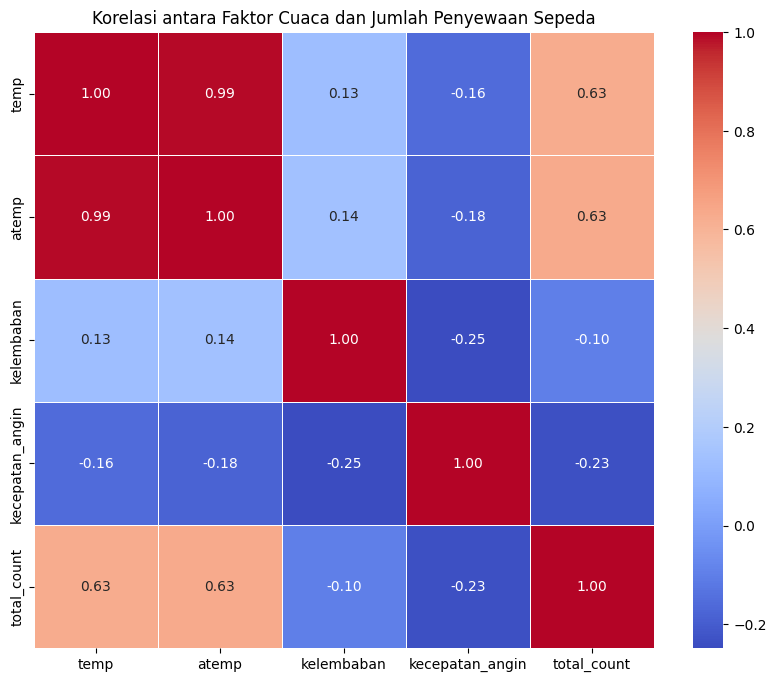

In [109]:
# Apakah kondisi cuaca memiliki dampak pada jumlah penyewaan?
correlation_weather_count = data_day[['temp', 'atemp', 'kelembaban', 'kecepatan_angin', 'total_count']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_weather_count, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi antara Faktor Cuaca dan Jumlah Penyewaan Sepeda')
plt.show()

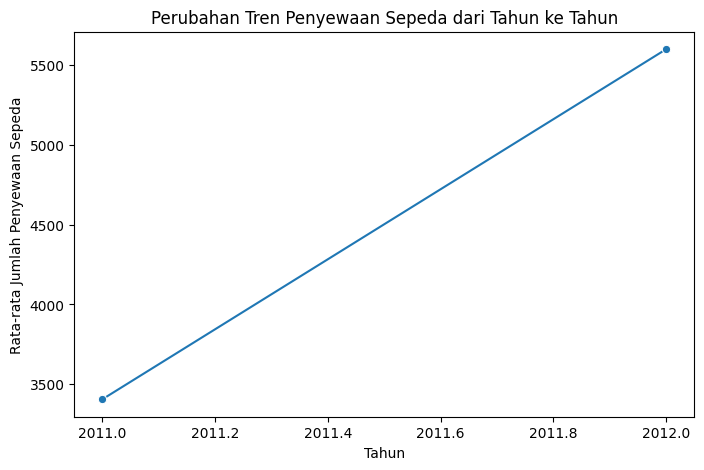

In [110]:
# Apakah ada perubahan tren signifikan dalam perilaku penyewaan dari tahun 2011 ke 2012?
trend_per_year = data_day.groupby('tahun')['total_count'].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(x=trend_per_year.index.astype(int), y=trend_per_year.values, marker='o')
plt.title('Perubahan Tren Penyewaan Sepeda dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.show()

### Pertanyaan 1:

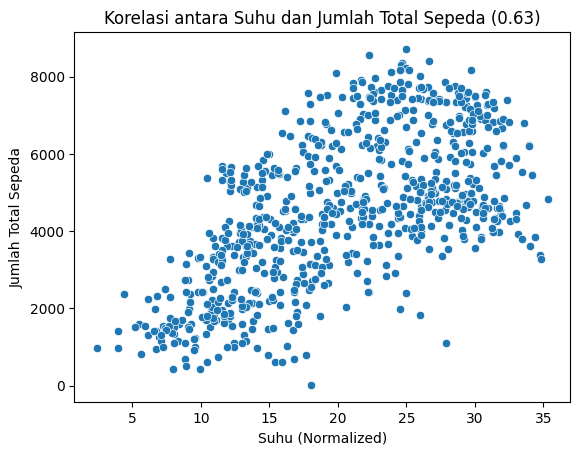

Terdapat hubungan positif antara suhu dan jumlah total sepeda.


In [111]:
# Apa korelasi antara suhu dan jumlah total sepeda yang disewa?
correlation = data_day['temp'].corr(data_day['total_count'])

# Interpretasi korelasi
if correlation > 0:
    correlation_interpretation = "Terdapat hubungan positif antara suhu dan jumlah total sepeda."
elif correlation < 0:
    correlation_interpretation = "Terdapat hubungan negatif antara suhu dan jumlah total sepeda."
else:
    correlation_interpretation = "Tidak ada hubungan linear yang signifikan antara suhu dan jumlah total sepeda."

# Visualisasi scatter plot
sns.scatterplot(x='temp', y='total_count', data=data_day)
plt.title(f'Korelasi antara Suhu dan Jumlah Total Sepeda ({correlation:.2f})')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Total Sepeda')
plt.show()

# Tampilkan kesimpulan
print(correlation_interpretation)

### Pertanyaan 2:

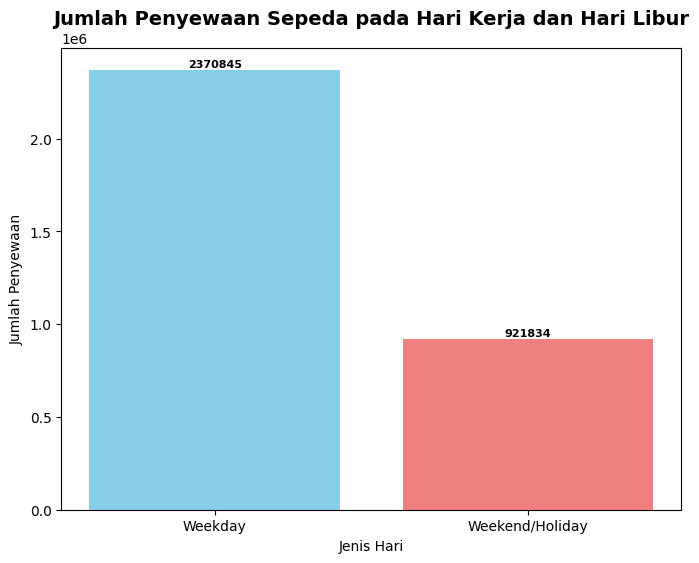

In [116]:
# berapa peresentasi penyewaan sepeda berbeda antara hari kerja dan hari libur?
day_type_rentals = data_day.groupby('day_type')['total_count'].sum()

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(day_type_rentals.index, day_type_rentals, color=['skyblue', 'lightcoral'])

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', fontsize=8, fontweight='bold')

ax.set_title('Jumlah Penyewaan Sepeda pada Hari Kerja dan Hari Libur', fontsize=14, fontweight='bold')
ax.set_xlabel('Jenis Hari')
ax.set_ylabel('Jumlah Penyewaan')

plt.show()


## Conclusion

- Terdapat hubungan positif antara suhu dan jumlah total sepeda, informasi ini bisa berguna untuk pengelola sistem penyewaan sepeda. Mereka dapat mengoptimalkan strategi pemasaran atau menyesuaikan inventaris sepeda berdasarkan perubahan musim.
- Terdapat perbedaan yang signifikan dalam pola penyewaan sepeda antara hari kerja dan hari libur. Mayoritas penyewaan terjadi pada hari kerja, sedangkan penyewaan pada hari libur merupakan sebagian kecil dari total penyewaan sepeda. Ini mungkin disebabkan oleh aktivitas bersepeda yang lebih tinggi di hari kerja, saat orang-orang mungkin menggunakan sepeda untuk transportasi sehari-hari.